In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import os
news2020 = pd.read_csv("/gdrive/My Drive/Colab Notebooks/data/pet/2020.01.01_2020.12.31_1.csv")
news2021 = pd.read_csv("/gdrive/My Drive/Colab Notebooks/data/pet/2021.01.01_2021.12.31_1.csv")
news2022 = pd.read_csv("/gdrive/My Drive/Colab Notebooks/data/pet/2022.01.01_2022.12.25_1.csv")
kipris = pd.read_csv("/gdrive/My Drive/Colab Notebooks/data/pet/kipris.csv")

In [ ]:
kipris.isnull().sum()

대표도면         7481
출원번호            0
발명의명칭           0
발명의명칭(영문)      12
상태              0
IPC분류           0
출원인             0
대리인           510
발명자             0
출원일자            0
등록번호         4341
등록일자         4341
공개번호         1120
공개일자         1120
dtype: int64

In [ ]:
kipris = kipris[["발명의명칭", "출원일자"]]
kipris.shape

(7481, 2)

In [ ]:
kipris["출원일자"] = pd.to_datetime(kipris["출원일자"])

In [ ]:
kipris["출원일자"] = kipris["출원일자"].dt.year

In [ ]:
kipris.columns = ['제목', '날짜']

In [ ]:
import re

def preprocessing(text):
    text = re.sub(r"[^가-힣0-9\s]", " ", text) #한글이랑 숫자, 공백만 남기기
    text = re.sub(r"\s+", " ", text) #중복 공백 없애기
    text = text.strip() #앞뒤 공백 없애기
    return text

In [ ]:
from tqdm import tqdm
tqdm.pandas()

kipris["제목"] = kipris["제목"].progress_map(preprocessing)

100%|██████████| 7481/7481 [00:00<00:00, 64873.69it/s]


In [ ]:
kipris.duplicated(subset=["제목"]).sum()

997

In [ ]:
kipris = kipris.drop_duplicates(['제목'])

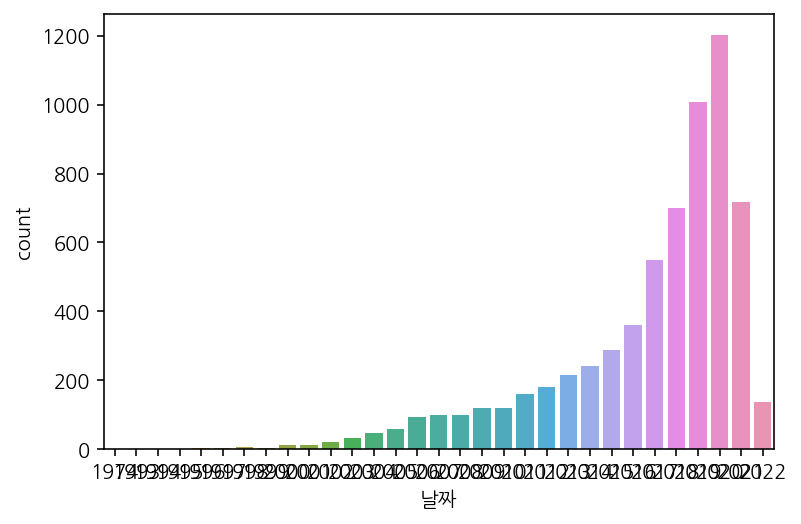

In [ ]:
sns.countplot(data=kipris, x="날짜");

In [ ]:
news2020["날짜"] = 2020
news2021["날짜"] = 2021
news2022["날짜"] = 2022

In [ ]:
news = pd.concat([news2020, news2021, news2022])

In [ ]:
news.rename(columns = {'0' : '제목'}, inplace = True)

In [ ]:
news["제목"] = news["제목"].progress_map(preprocessing)

100%|██████████| 12000/12000 [00:00<00:00, 122002.81it/s]


In [ ]:
news.duplicated(subset=["제목"]).sum()

3681

In [ ]:
news = news.drop_duplicates(['제목'])

In [ ]:
news["분류"] = "뉴스"
kipris["분류"] = "특허"

<ipython-input-21-b848c1f2da48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news["분류"] = "뉴스"


In [ ]:
df = pd.concat([news, kipris])
df = df.reset_index(drop=True, inplace=False)
df

,제목,날짜,분류
0,은평구 반려동물 문화교실 댕댕이 스쿨 운영,2020,뉴스
1,새해부터 반려동물 미용사 나무의사도 신중년 고용장려금 받는다,2020,뉴스
2,반려식물로 코로나 우울 해소,2020,뉴스
3,우리 아이와 반려동물 함께 생활해도 괜찮을까,2020,뉴스
4,영상 반려동물 식품의 세계화 정부지원 받아 글로벌기업으로 우뚝,2020,뉴스
...,...,...,...
14798,펫 금융 계좌를 이용한 펫 금융 서비스 제공 장치 및 그 동작 방법,2021,특허
14799,맞춤형 추천 서비스를 제공하는 온라인 판매 방법,2018,특허
14800,자동 물내림 장치,2018,특허
14801,애완동물 리드줄 제어장치 및 방법,2020,특허


In [ ]:
df.isnull().sum()

제목    0
날짜    0
분류    0
dtype: int64

In [ ]:
df.duplicated(subset=["제목"]).sum()

0

In [ ]:
df.to_csv("/gdrive/My Drive/Colab Notebooks/data/pet/data.csv")

In [ ]:
df.sample(20)

,제목,날짜,분류
9607,반려 동물을 위한 위치 기반의 하울링 서비스 제공 방법 및 서버,2022,특허
5414,변화 이룰 수만 있다면 청년 정체성 적극 활용하겠다,2021,뉴스
12645,천연 점액질을 이용하여 성형되는 자연식 사료 및 그 제조방법,2015,특허
3711,우송정보대 과학기술대 농림축산식품부 동물보건사 인증 평가 획득,2021,뉴스
4628,대구보건고등학교 반려동물케어과 동아리 반려동물 진료비 후원금 전달,2021,뉴스
13627,화분,2017,특허
4242,아모레퍼시픽 반려동물 라이프스타일 브랜드 론칭,2021,뉴스
6972,부산경상대 반려동물보건 산업과 반려동물 자연식 경진대회 개최,2022,뉴스
2796,공감 반려동물 용인시 기흥호수공원 도시숲 과 반려동물 놀이터,2020,뉴스
487,아주 각별한 기행 임종덕씨 반려마 흑진주 신나는 질주 곽수연의 특별한 동,2020,뉴스
